In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import sys
import os


plt.style.use('../../styles/general.mplstyle')

In [2]:
sys.path.append('../../pypoptim/mpi_scripts/')
from ina_model import InaModel

dirname = '../../src/model_ctypes/ina_pipette_more_params/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)
INA = InaModel(filename_so_abs)

In [3]:
df_protocol = pd.read_csv('../../data/protocols/protocol_trace.csv')
df_initial_state_protocol = pd.read_csv('../../data/protocols/protocol_initial_state.csv')

In [4]:
M1 =  pd.read_csv('../../src/model_ctypes/ina_pipette_more_params/legend_test.csv', index_col='name').value
M2 =  pd.read_csv('../../src/model_ctypes/ina_pipette/legend_test.csv', index_col='name').value
M3 =  pd.read_csv('../../src/model_ctypes/ina_pipette_linked_m_tau/legend_test.csv', index_col='name').value
M4 =  pd.read_csv('../../src/model_ctypes/ina_pipette_linked_minf_tau/legend_test.csv', index_col='name').value

In [5]:
C = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value'] 
S = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value'] 
A = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')['value'] 

In [6]:
dirname1 = '../../src/model_ctypes/ina_pipette_more_params/'
filename_so_1 = os.path.join(dirname1, 'ina.so')
filename_so_abs_m1 = os.path.abspath(filename_so_1)
INA_M1 = InaModel(filename_so_abs_m1)

dirname2 = '../../src/model_ctypes/ina_pipette/'
filename_so_2 = os.path.join(dirname2, 'ina.so')
filename_so_abs_m2 = os.path.abspath(filename_so_2)
INA_M2 = InaModel(filename_so_abs_m2)

dirname3 = '../../src/model_ctypes/ina_pipette_linked_m_tau/'
filename_so_3 = os.path.join(dirname3, 'ina.so')
filename_so_abs_m3 = os.path.abspath(filename_so_3)
INA_M3 = InaModel(filename_so_abs_m3)

dirname4 = '../../src/model_ctypes/ina_pipette_linked_minf_tau/'
filename_so_4 = os.path.join(dirname4, 'ina.so')
filename_so_abs_m4 = os.path.abspath(filename_so_4)
INA_M4 = InaModel(filename_so_abs_m4)

In [7]:
output_S, output_A = INA.run(A,S,C, df_protocol, df_initial_state_protocol, return_algebraic=True)

In [8]:
output_S_M1, output_A_M1 = INA_M1.run(A,S,M1, df_protocol, df_initial_state_protocol, return_algebraic=True)
output_S_M2, output_A_M2 = INA_M2.run(A,S,M2, df_protocol, df_initial_state_protocol, return_algebraic=True)
output_S_M3, output_A_M3 = INA_M3.run(A,S,M3, df_protocol, df_initial_state_protocol, return_algebraic=True)
output_S_M4, output_A_M4 = INA_M4.run(A,S,M4, df_protocol, df_initial_state_protocol, return_algebraic=True)

In [9]:
col = ['C0', 'C1','C2','C3']
lab = ['m1', 'm2', 'm3', 'm4']

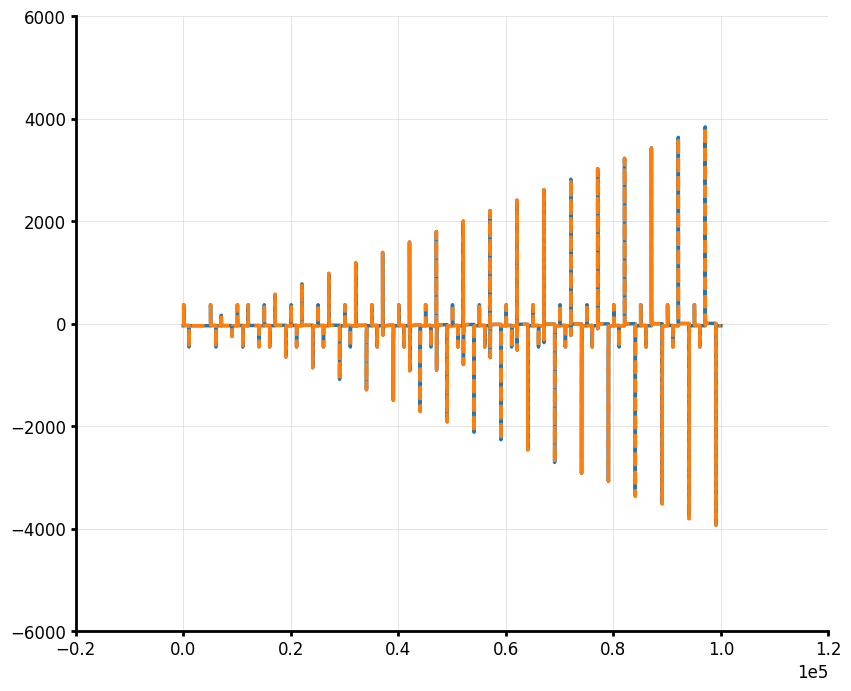

In [10]:
plt.plot(output_S_M2.I_out)
plt.plot(pd.read_csv("../../data/test_models/trace_M2_art.csv").I_out, linestyle = '--')

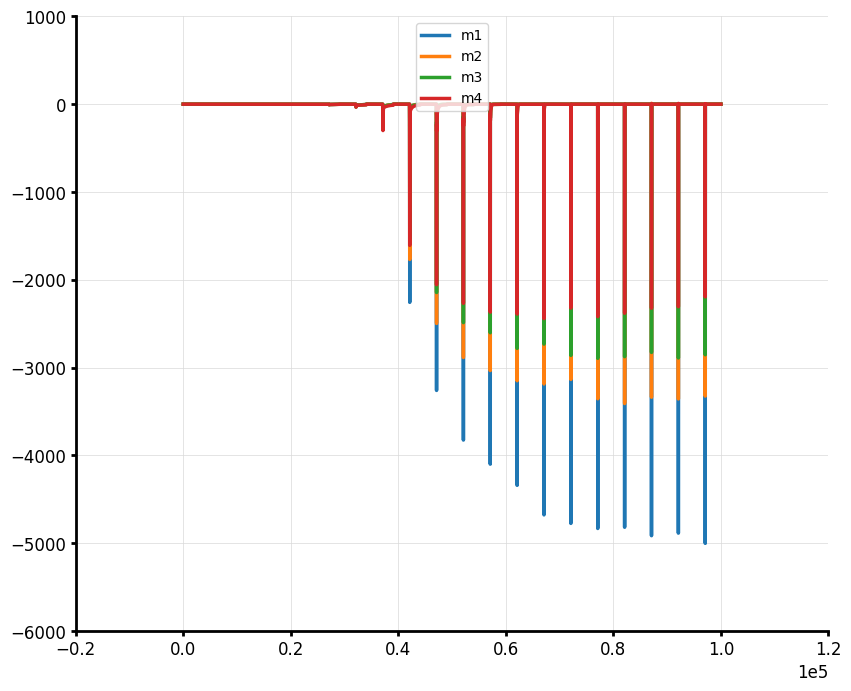

In [11]:
for k, M in enumerate([output_A_M1, output_A_M2, output_A_M3, output_A_M4]):
    plt.plot(M.I_Na, color = col[k], label = lab[k])
plt.legend()

In [12]:
art_data = pd.read_csv("../../data/training/artificial_data.csv")
art_data.t

0        0.00000
1        0.00005
2        0.00010
3        0.00015
4        0.00020
          ...   
99995    4.99975
99996    4.99980
99997    4.99985
99998    4.99990
99999    4.99995
Name: t, Length: 100000, dtype: float64

In [13]:
#pd.DataFrame(np.array([art_data.t, output_S_M1.I_out]).T, columns=['t', 'I_out']).to_csv('../../data/test_models/trace_M1_art.csv')

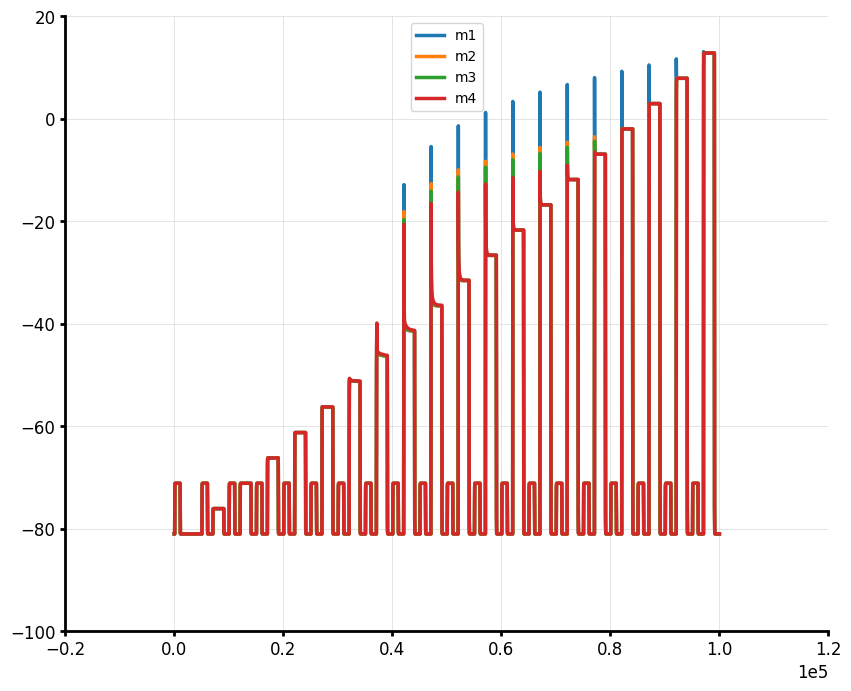

In [14]:
for k, M in enumerate([output_S_M1, output_S_M2, output_S_M3, output_S_M4]):
    plt.plot(M.v_m, color = col[k], label = lab[k])
plt.legend()

In [43]:
models_label = ['M1', 'M2', 'M3', 'M4']

models_color = ['C1','C2', 'C3', 'C4']

<ipython-input-45-421a112c495f>:52: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


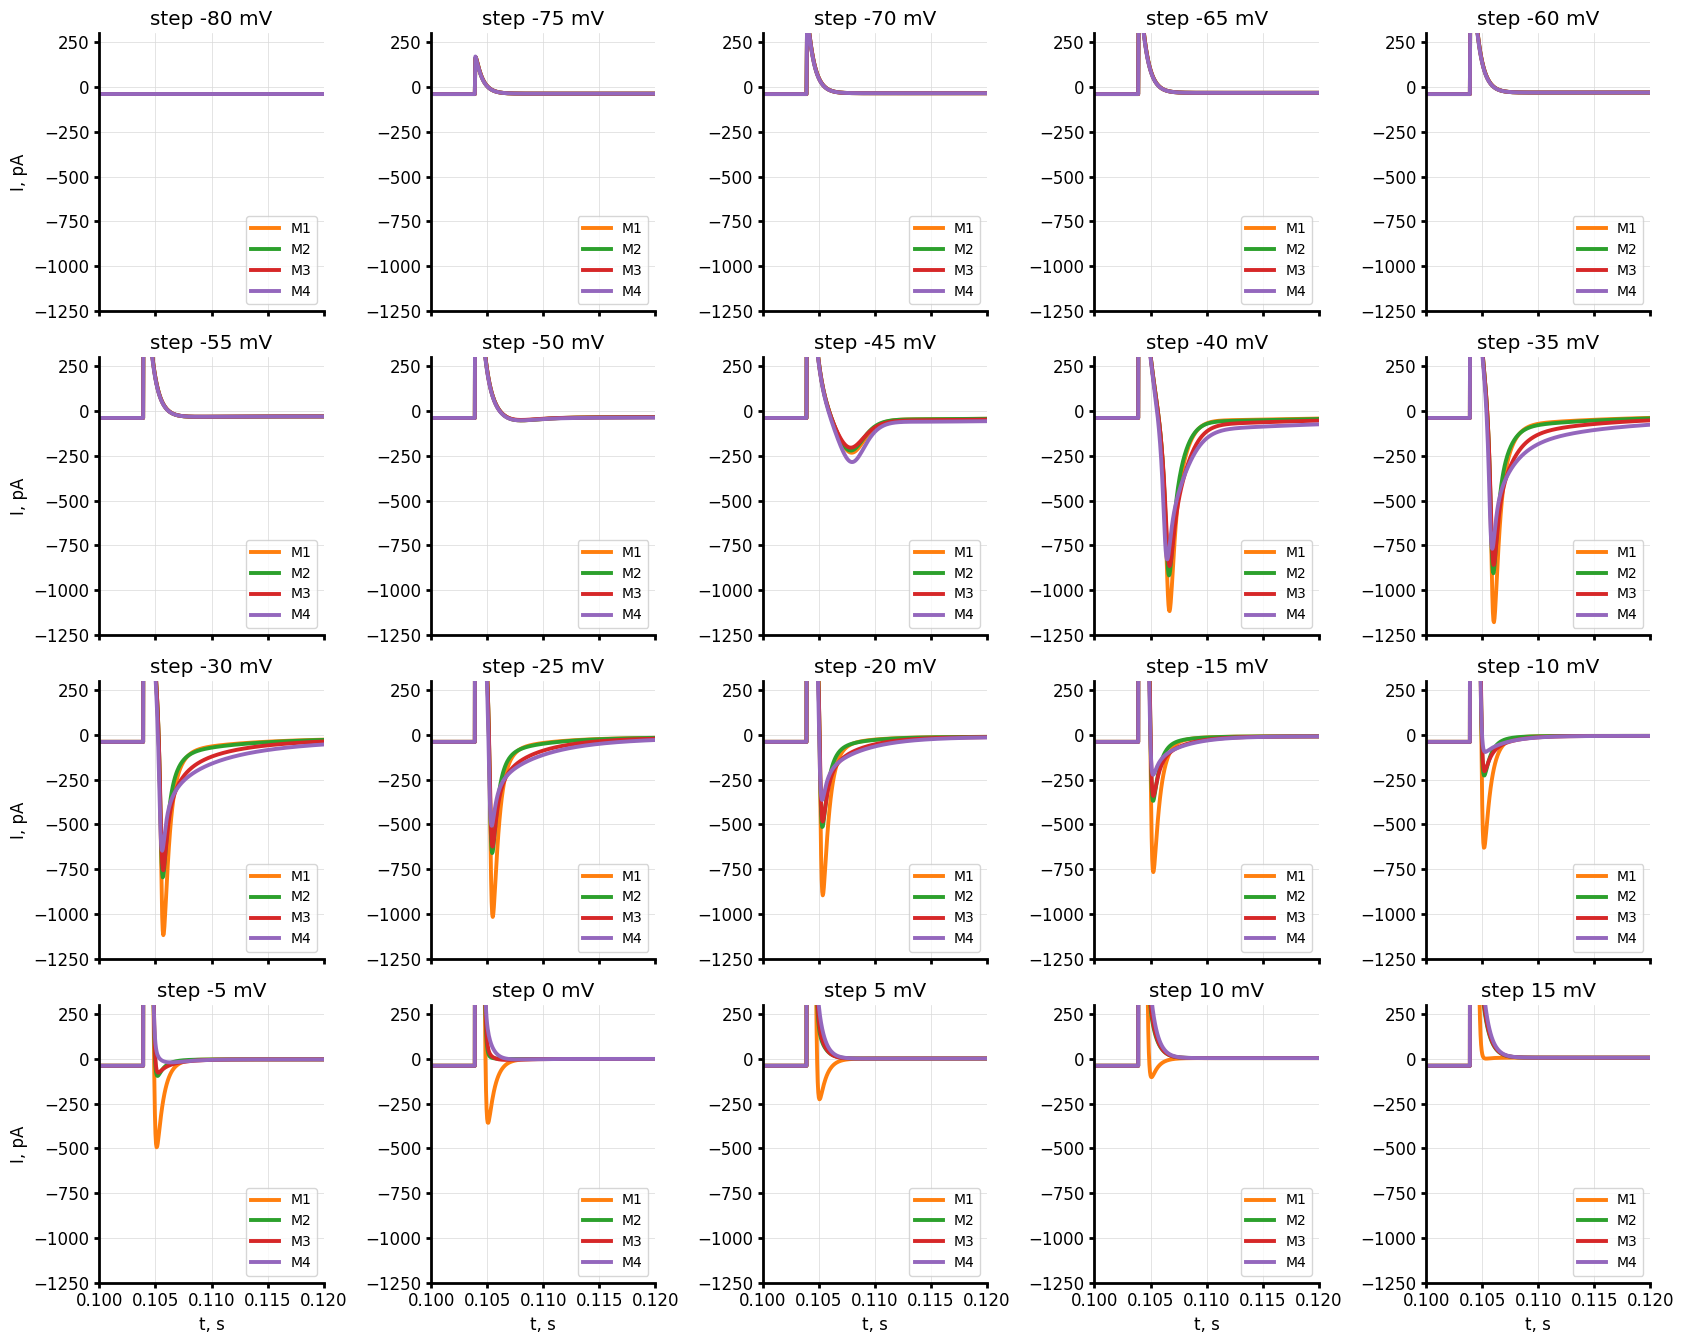

In [45]:
o_M1 = output_S_M1.I_out
o_M2 = output_S_M2.I_out
o_M3 = output_S_M3.I_out
o_M4 = output_S_M4.I_out

n_sections = 20
split_indices = np.linspace(0, len(o_M1), n_sections + 1).astype(int)
nrows, ncols = 4, 5
dt = 5e-5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

colors = ['0.3', 'C1']
i_global = 0

for i_row in range(nrows):
    for i_col in range(ncols):
        ax = axes[i_row, i_col]
        plt.sca(ax)

        i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
        slice_current = slice(i_start, i_end)

        o_m1 = o_M1[slice_current]
        o_m2 = o_M2[slice_current]
        o_m3 = o_M3[slice_current]
        o_m4 = o_M4[slice_current]
        t = np.arange(len(o_m1)) * dt
        lw = 2.8
        plt.plot(t, o_m1, color=models_color[0], linewidth = lw, label = models_label[0])
        plt.plot(t, o_m2, color=models_color[1], linewidth = lw, label = models_label[1])
        plt.plot(t, o_m3, color=models_color[2], linewidth = lw, label = models_label[2])
        plt.plot(t, o_m4, color=models_color[3], linewidth = lw, label = models_label[3])

        step_value = -80 + 5 * i_global
        title = f'step {step_value} mV'
        plt.title(title)
        plt.legend(loc='lower right')
        

        i_global += 1
        plt.xlim(0.1,0.12)
        plt.ylim(-1250, 300)
        if i_row == 3:
            plt.xlabel('t, s')
        if i_col ==0:
            plt.ylabel('I, pA')



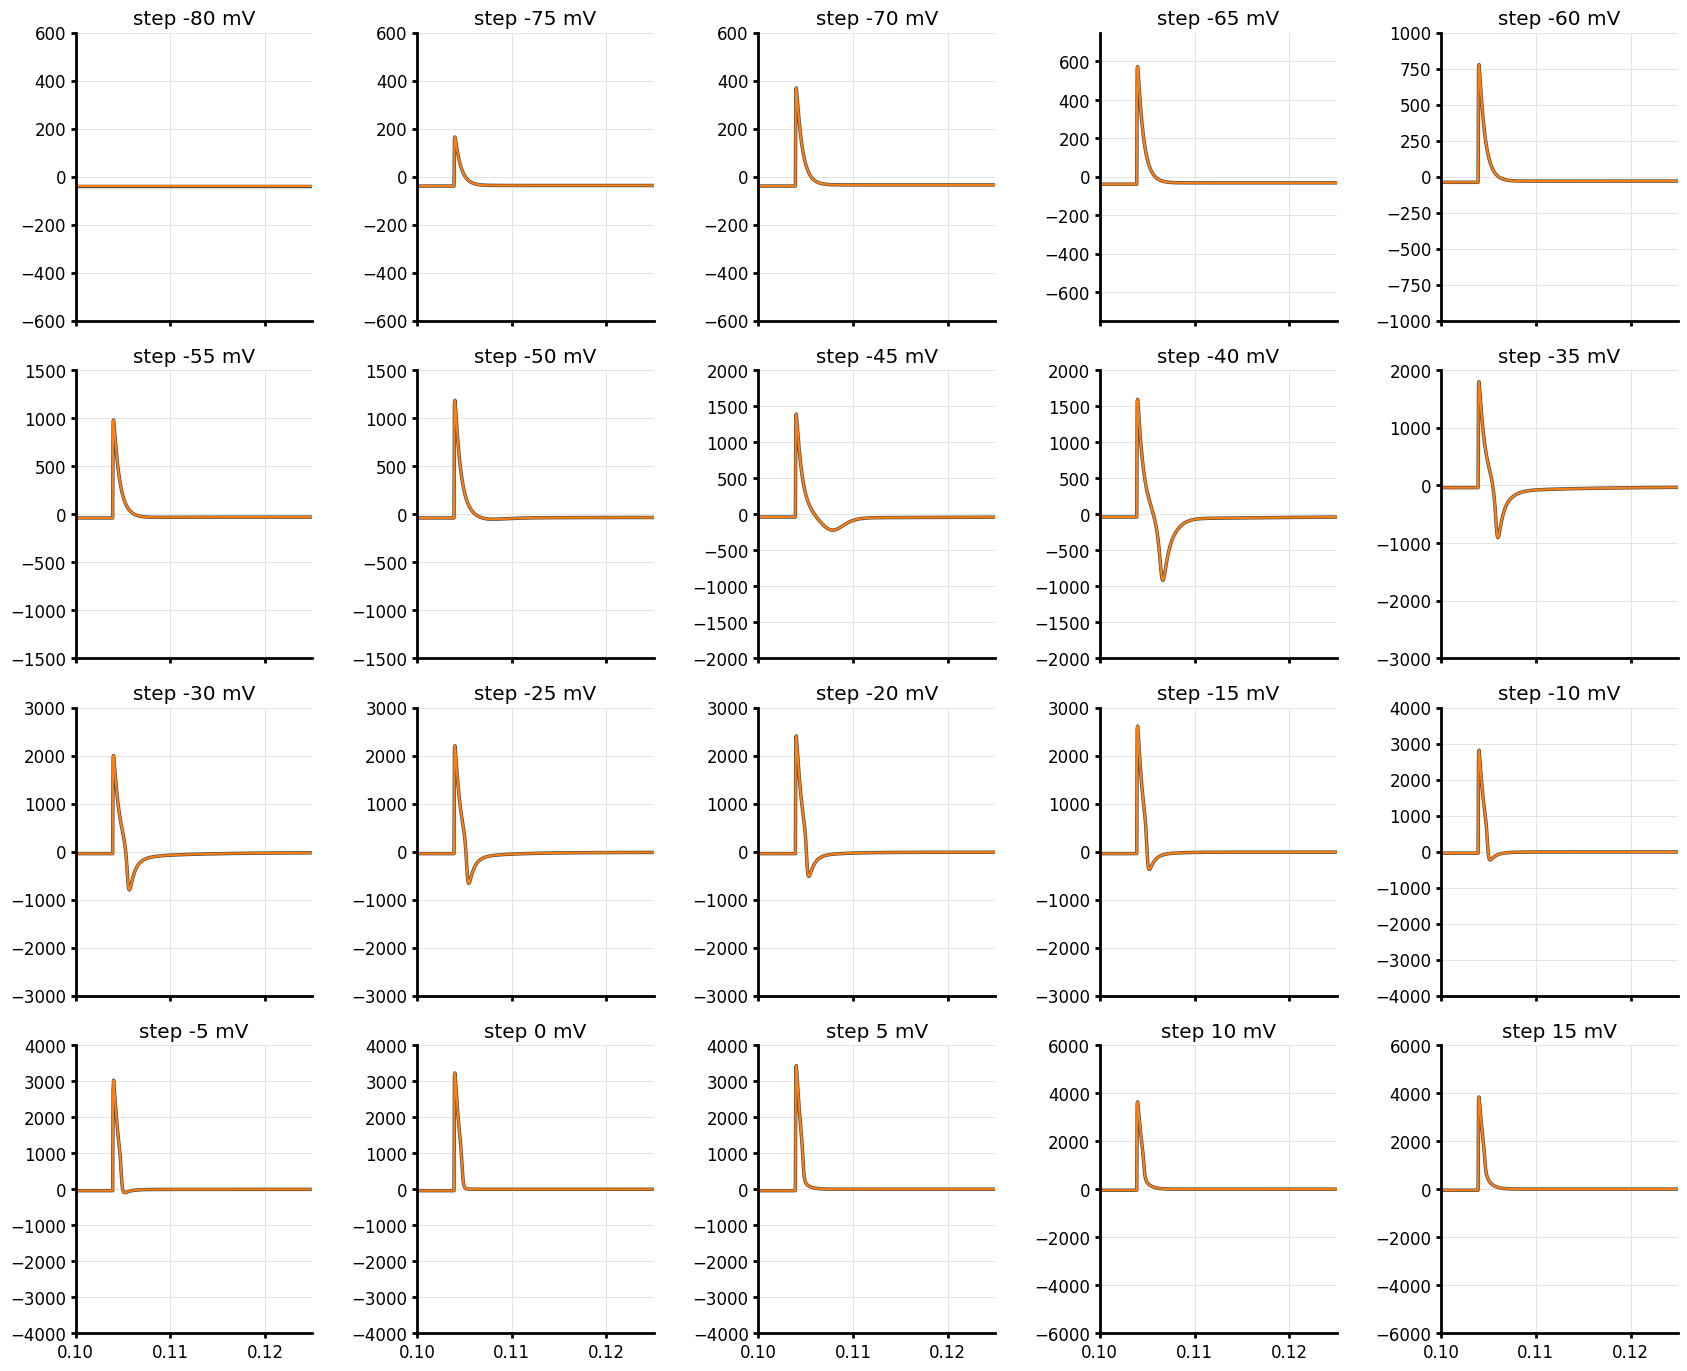

In [170]:
I_out = output_S_M2.I_out
real_data_all = output_S_M1.I_out


n_sections = 20
split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)
nrows, ncols = 4, 5
dt = 5e-5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

colors = ['0.3', 'C1']
i_global = 0

for i_row in range(nrows):
    for i_col in range(ncols):
        ax = axes[i_row, i_col]
        plt.sca(ax)

        i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
        slice_current = slice(i_start, i_end)

        I_out_current = I_out[slice_current]
        data_current  = real_data_all[slice_current]
        t = np.arange(len(data_current)) * dt

        plt.plot(t, data_current, color=colors[0])
        plt.plot(t, I_out_current, color=colors[1], lw=1.5)

        step_value = -80 + 5 * i_global
        title = f'step {step_value} mV'
        plt.title(title)

        i_global += 1
        plt.xlim(0.1,0.125)
        #plt.ylim(-700, 300)



In [46]:
def give_tau_from_a_b(v_m, params):
    tau_m = 1 / (params.a0_m * np.exp(v_m / params.s_m) + params.b0_m * np.exp(- v_m / params.delta_m))
    tau_h = 1 / (params.a0_h * np.exp(-v_m / params.s_h) + params.b0_h * np.exp(v_m / params.delta_h))
    tau_j = params.tau_j_const + 1 / (params.a0_j * np.exp(-v_m / params.s_j) + params.b0_j * np.exp(v_m / params.delta_j))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

def give_tau_from_v_half(v_m, params):
    tau_m = 1 / (params.a0_m * np.exp(v_m / params.s_m)*(1 + np.exp(- (v_m + params.v_half_m)/ params.k_m)))
    tau_h = 1 / (params.a0_h * np.exp(-v_m / params.s_h)*(1 + np.exp((v_m + params.v_half_h)/ params.k_h)))
    tau_j = params.tau_j_const + 1 / (params.a0_j * np.exp(-v_m / params.s_j)*(1 + np.exp((v_m + params.v_half_h)/ params.k_h)))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

def give_tau_more_params_from_a_b(v_m, params):
    tau_m = params.tau_m_const + 1 / (params.a0_m * np.exp(v_m / params.s_m) + params.b0_m * np.exp(- v_m / params.delta_m))
    tau_h = params.tau_h_const +1 / (params.a0_h * np.exp(-v_m / params.s_h) + params.b0_h * np.exp(v_m / params.delta_h))
    tau_j = params.tau_j_const + 1 / (params.a0_j * np.exp(-v_m / params.s_j) + params.b0_j * np.exp(v_m / params.delta_j))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

def give_m_h_from_v_half(v_m,params):
    m_inf = 1 / (1 + np.exp(-(params.v_half_m + v_m) / params.k_m))
    h_inf = 1 / (1 + np.exp((params.v_half_h + v_m) / params.k_h))
    return {'m': m_inf,
            'h': h_inf,
           }

def give_m_h_from_a_b(v_m,params):
    m_inf = 1/( 1 + np.exp(-v_m*(1/params.delta_m + 1/params.s_m))*params.b0_m/params.a0_m)
    h_inf = 1 / (1 + np.exp(v_m*(1/params.delta_h + 1/params.s_h))*params.b0_h/params.a0_h )
    return {'m': m_inf,
            'h': h_inf,
           }


In [47]:
V = np.arange(-100, 20)

In [ ]:
p1 = 99.1744;
p2 = 12.8321;
p3 = 0.0039;
p4 = -8.2139;
m1 = p1;
m2 = p2;
m3 = p1 * p3;
m4 = 1.0 / (1.0 / p2  + 1.0 / p4);
tau_m_const =  0.0374383;

w1 = 0.0062605;
w2 = -21.6256454;
w3 = 17575.4542604;
w4 = 6.7241405;
tau_h_const = 0.1999625;
h1 = w1;
h2 = w2;
h3 = w1 * w3;
h4 = 1.0 / (1.0 / w2  + 1.0 / w4); 

v1 = 0.00064626;
v2 = -69.41735068;
v3 = 17575.45426044;
v4 = 6.72414053;
tau_j_const = 1.32187439;

j1 = v1;
j2 = v2;
j3 = v1 * v3;
j4 = 1.0 / (1.0 / v2 + 1.0 / v4);
alpha_h = h1 * np.exp( ( V ) / h2 );
beta_h = h3 * np.exp( ( V ) / h4 );
h_inf = ( alpha_h / ( alpha_h + beta_h ) );
tau_h = ( ( 1. / ( alpha_h + beta_h ) ) + tau_h_const );
    
alpha_j = j1 * np.exp( ( V ) / j2 );
beta_j = j3 * np.exp( ( V ) / j4 );
j_inf = ( alpha_j / ( alpha_j + beta_j ) );
tau_j = ( ( 1. / ( alpha_j + beta_j ) ) + tau_j_const );
    
alpha_m = m1 * np.exp( ( V ) / m2 );
beta_m = m3 * np.exp( ( V ) / m4 );
m_inf = alpha_m / ( alpha_m + beta_m );
tau_m = ( ( 1. / ( alpha_m + beta_m ) ) + tau_m_const );


In [204]:
tau_h_const/1000

0.0001999625

In [ ]:
v_half_m = np.log(m3/m1)*m2*m4/(m2-m4)-18
v_half_h = np.log(h3/h1)*h2*h4/(h2-h4)-18
k_m = -m2*m4/(m2 - m4)
k_h = h2*h4/(h2-h4)

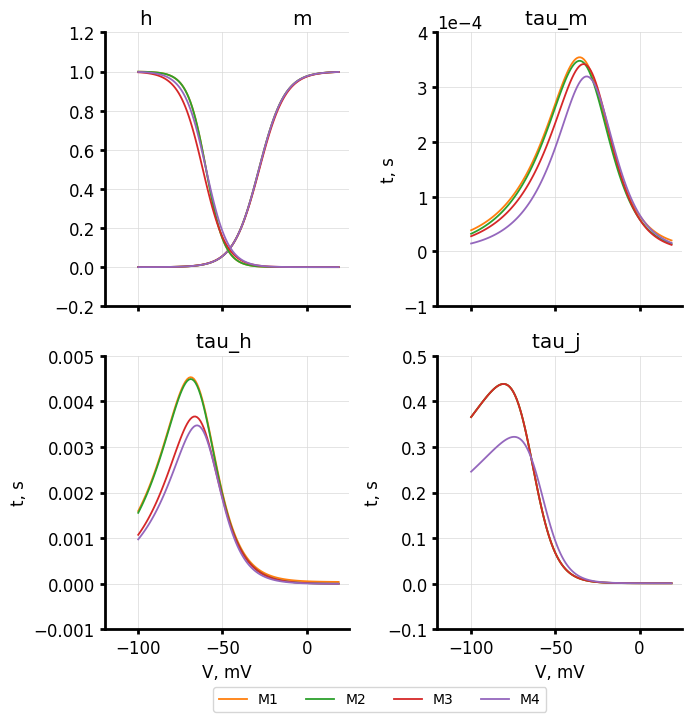

In [162]:
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols),
                             sharex=True)

axes = axes.flatten()

col = 0


M1_list = [[mh1['m'], mh1['h'] ],
                  [tau1['tau_m']],
                  [tau1['tau_h']],
                  [tau1['tau_j']]]

M4_list = [[mh4['m'], mh4['h'] ],
                  [tau4['tau_m']],
                  [tau4['tau_h']],
                  [tau4['tau_j']]]

M3_list = [[mh3['m'], mh3['h'] ],
                  [tau3['tau_m']],
                  [tau3['tau_h']],
                  [tau3['tau_j']]]

M2_list = [[mh2['m'], mh2['h'] ],
                  [tau2['tau_m']],
                  [tau2['tau_h']],
                  [tau2['tau_j']]]

    
title_list = [['0', 'h                      m'],
                   ['tau_m '],
                   ['tau_h '],
                   ['tau_j ']]

m_label_list = [[models_label, [None,None,None, None]],
               [[None,None,None, None]],
               [[None,None,None, None]],
               [[None,None,None, None]]]
y_label_list = [[None, None],
                ['t, s'],
                ['t, s'],
                ['t, s'],]
                
    
stop_legend = 0
n = 0

for i1,i2,i3,i4 ,ax, titles, y_lab, m_lab in zip(M1_list, M2_list, M3_list, M4_list,axes, title_list, y_label_list, m_label_list):
    if n>1:
        ax.set_xlabel('V, mV')
    n+=1
    for item1, item2, item3, item4, title, m_label, y_label in zip(i1, i2, i3, i4, titles, m_lab, y_lab):
        ax.plot(V, item1,lw = 1.3, color = models_color[0], label = m_label[0])
        ax.plot(V, item2,lw = 1.3, color = models_color[1], label = m_label[1])
        ax.plot(V, item3,lw = 1.3, color = models_color[2], label = m_label[2])
        ax.plot(V, item4,lw = 1.3, color = models_color[3], label = m_label[3])
        ax.set_xlim(-120, 25)
        ax.set_ylabel(y_label)
        
    #ax.legend(loc='lower left')      
    ax.set_title(title)
fig.legend(loc = 'lower center', ncol = 4, bbox_to_anchor=(0.55, -0.05))
plt.tight_layout()
filename_save = '../../data/pictures/characteristics_all_model.png'
plt.savefig(filename_save,bbox_inches='tight')


In [48]:
M1 =  pd.read_csv('../../src/model_ctypes/ina_pipette_more_params/legend_test.csv', index_col='name').value
M2 =  pd.read_csv('../../src/model_ctypes/ina_pipette/legend_test.csv', index_col='name').value
M3 =  pd.read_csv('../../src/model_ctypes/ina_pipette_linked_m_tau/legend_test.csv', index_col='name').value
M4 =  pd.read_csv('../../src/model_ctypes/ina_pipette_linked_minf_tau/legend_test.csv', index_col='name').value

In [49]:
mh1 = give_m_h_from_v_half(V, M1)
mh2 = give_m_h_from_v_half(V, M2)
mh3 = give_m_h_from_a_b(V, M3)
mh4 = give_m_h_from_v_half(V, M4)

tau1 = give_tau_more_params_from_a_b(V, M1)
tau2 = give_tau_from_a_b(V, M2)
tau3 = give_tau_from_a_b(V, M3)
tau4 = give_tau_from_v_half(V, M4)

In [50]:
plt.plot(V,tau_j/1000, color = 'k')
for i, tau in enumerate([tau1, tau2, tau3, tau4]):
    plt.plot(V, tau['tau_j'], color = col[i], linestyle = '--', label = lab[i])
plt.legend()


NameError: name 'tau_j' is not defined

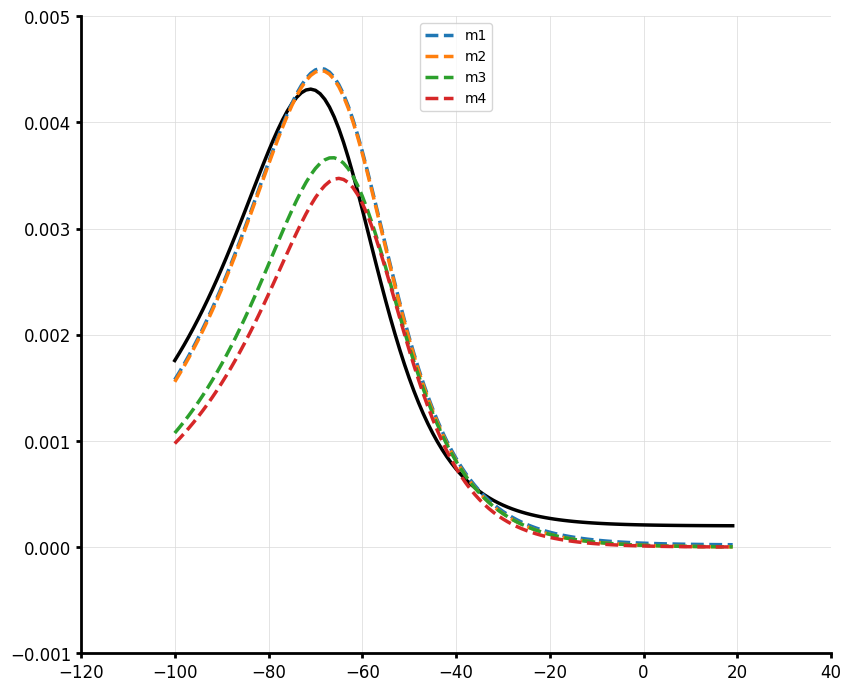

In [234]:
plt.plot(V,tau_h/1000, color = 'k')
for i, tau in enumerate([tau1, tau2, tau3, tau4]):
    plt.plot(V, tau['tau_h'], color = col[i], linestyle = '--', label = lab[i])
plt.legend()


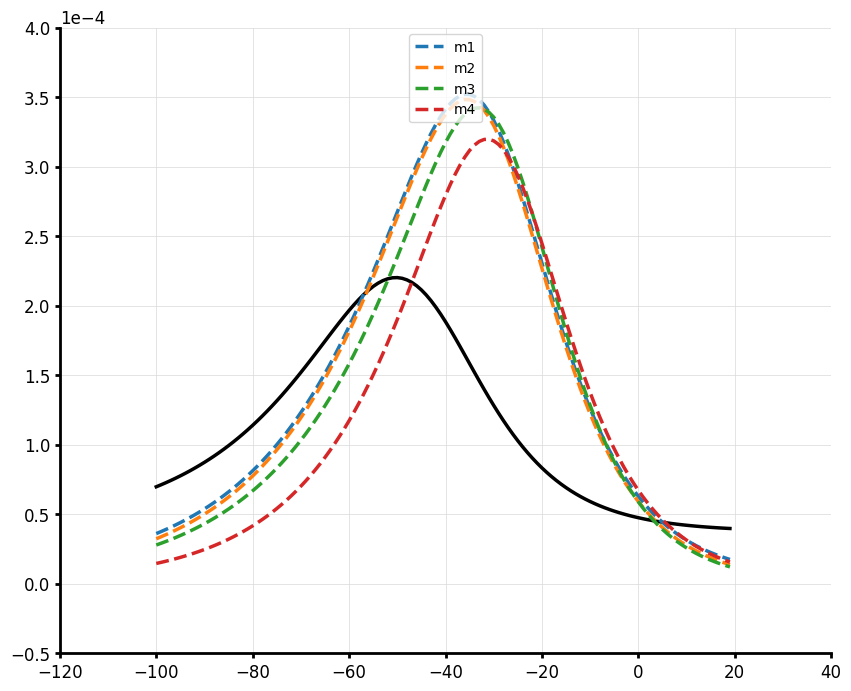

In [235]:
plt.plot(V,tau_m/1000, color = 'k')
for i, tau in enumerate([tau1, tau2, tau3, tau4]):
    plt.plot(V, tau['tau_m'], color = col[i], linestyle = '--', label = lab[i])
plt.legend()


In [236]:
col

['C0', 'C1', 'C2', 'C3']

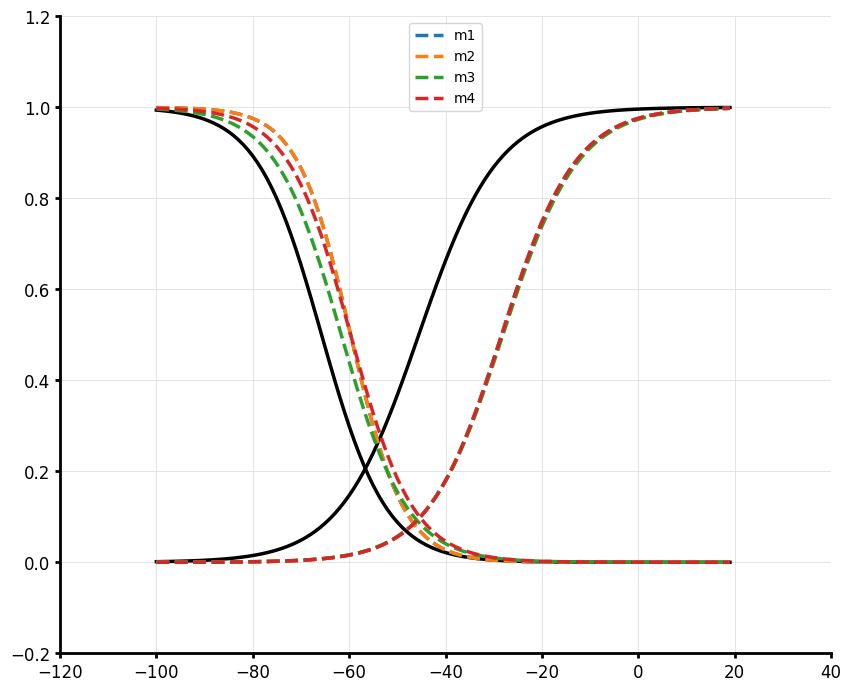

In [237]:
plt.plot(V, m_inf, color = 'k')
plt.plot(V, h_inf, color = 'k')
for i, mh in enumerate([mh1, mh2, mh3, mh4]):
    plt.plot(V, mh['m'], color = col[i], linestyle = '--', label = lab[i])
    plt.plot(V, mh['h'], color = col[i], linestyle = '--')
plt.legend()


In [270]:
A.to_csv('../../src/model_ctypes/ina_pipette_more_params/legend_constants_cc.csv')

In [271]:
from loss_utils import calculate_loss
from io_utils import collect_results


In [272]:
lab = ['c_p', 'c_m', 'a0_m', 'b0_m', 'delta_m', 's_m', 'a0_h', 'b0_h', 'delta_h', 's_h', 'a0_j', 'b0_j', 'delta_j', 's_j', 'tau_j_const', 'R', 'R_f', 'g_max', 'g_leak', 'tau_z', 'x_c_comp', 'x_r_comp', 'alpha']

In [274]:
import sys
sys.path.append("../mpi_scripts/")

In [275]:
from pypoptim.algorythm.ga import GA
from ina_model import InaModel
from solmodel import SolModel

In [276]:
model = InaModel(config['runtime']['filename_so_abs'])
SolModel.model = model
SolModel.config = config

ga_optim = GA(SolModel,
              bounds=config['runtime']['bounds'],
              gammas=config['runtime']['gammas'],
              mask_log10_scale=config['runtime']['mask_multipliers'],
              gamma_default=config['runtime']['kw_ga']['gamma'])

In [302]:
# names of genes
test = '210824_204247'
result = collect_results(test, '../../results/test_models/', dump_keys=['best', 'dump'])
config = result['config'].copy()
m_index = config['runtime']['m_index']

dump_genes = result['dump']['dump']['genes'].reshape((-1, len(m_index)))
n_organisms = config['runtime']['n_organisms']

n_generations = len(dump_genes) // n_organisms
# multiindex (generation, numb_of_organism) 
index = pd.MultiIndex.from_product([range(n_generations), range(n_organisms)],
                                   names=['epoch', 'org'])

dump_genes = pd.DataFrame(dump_genes, columns=m_index, index=index)
loss = result['dump']['best']['loss']
dump_loss = result['dump']['dump']['loss'].reshape((n_generations, config['runtime']['n_organisms']))
epochs = []
for k in range(n_generations):
    for l in range(n_organisms):
        epochs.append(k)

No handles with labels found to put in legend.


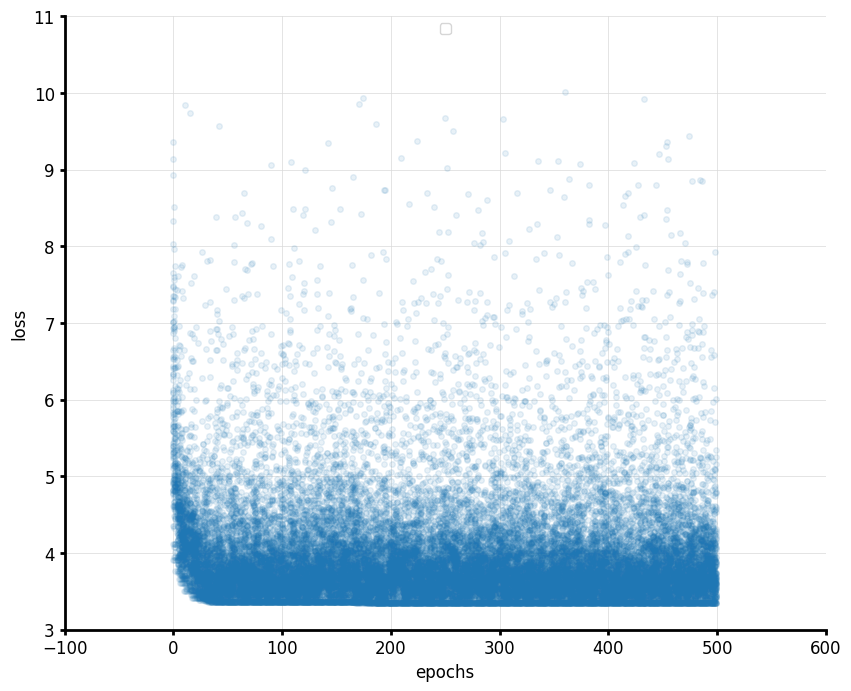

In [303]:
plt.plot( epochs, np.log(result['dump']['dump']['loss']) , '.', alpha=0.1)
plt.plot()
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.xlim(3.5,3.8)
#plt.ylim(500, 600)
plt.legend()

In [301]:
pd.read_csv('../../data/sample_weights/weights_1_5_10_30.csv')

Unnamed: 0        t    w
0               0  0.00000  5.0
1               1  0.00005  5.0
2               2  0.00010  5.0
3               3  0.00015  5.0
4               4  0.00020  5.0
...           ...      ...  ...
99995       99995  4.99975  5.0
99996       99996  4.99980  5.0
99997       99997  4.99985  5.0
99998       99998  4.99990  5.0
99999       99999  4.99995  5.0

[100000 rows x 3 columns]

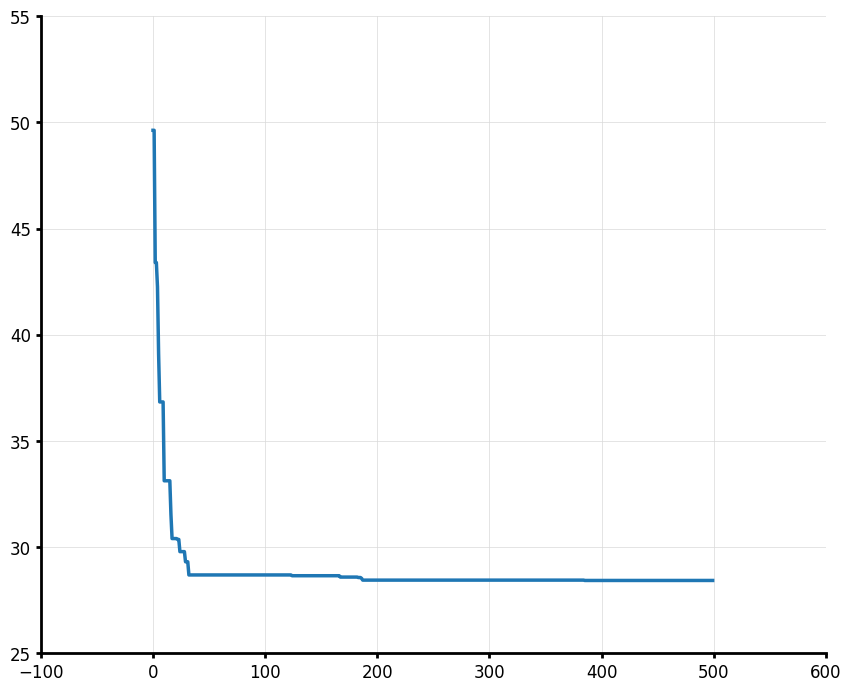

In [306]:
plt.plot(loss)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


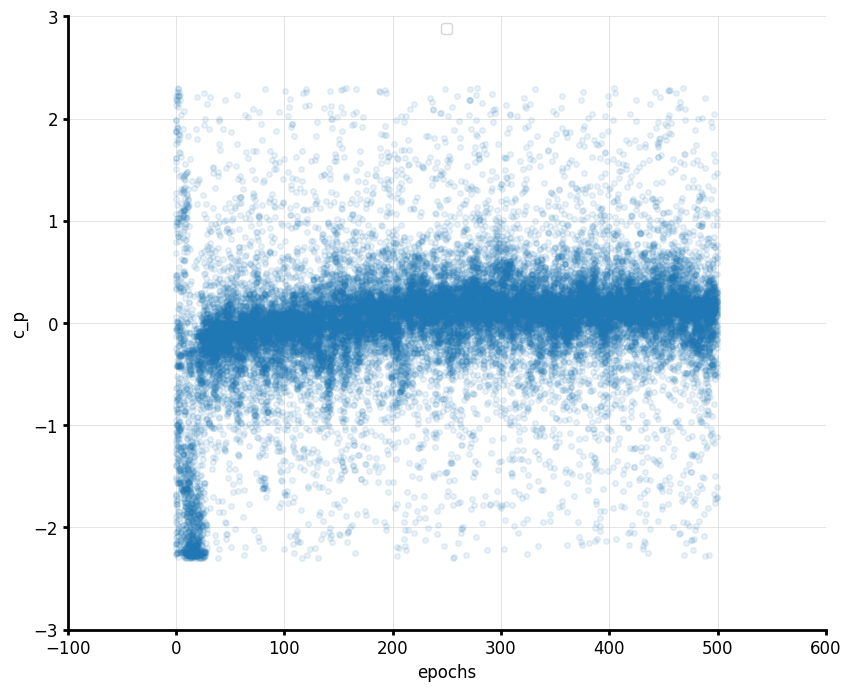

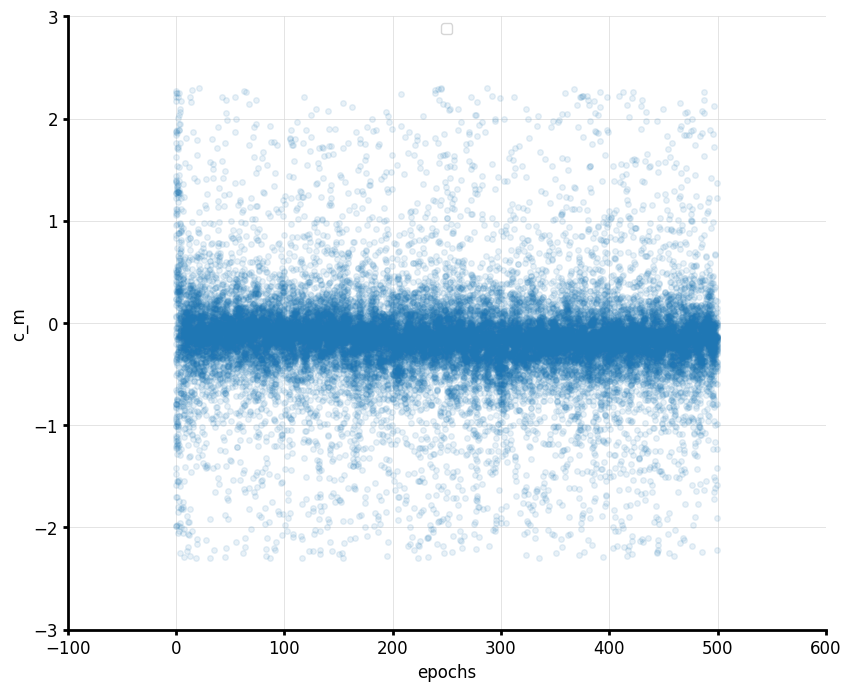

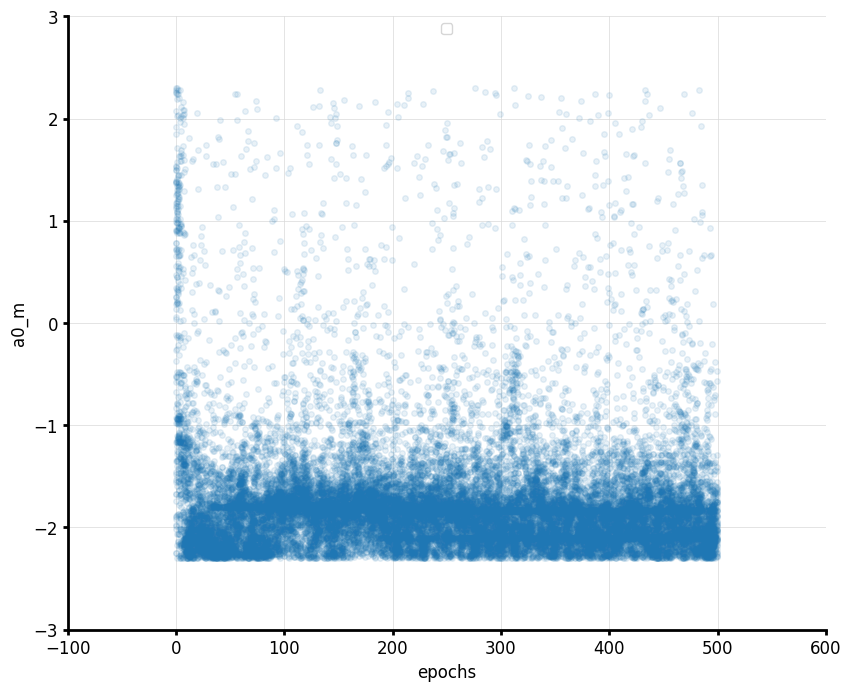

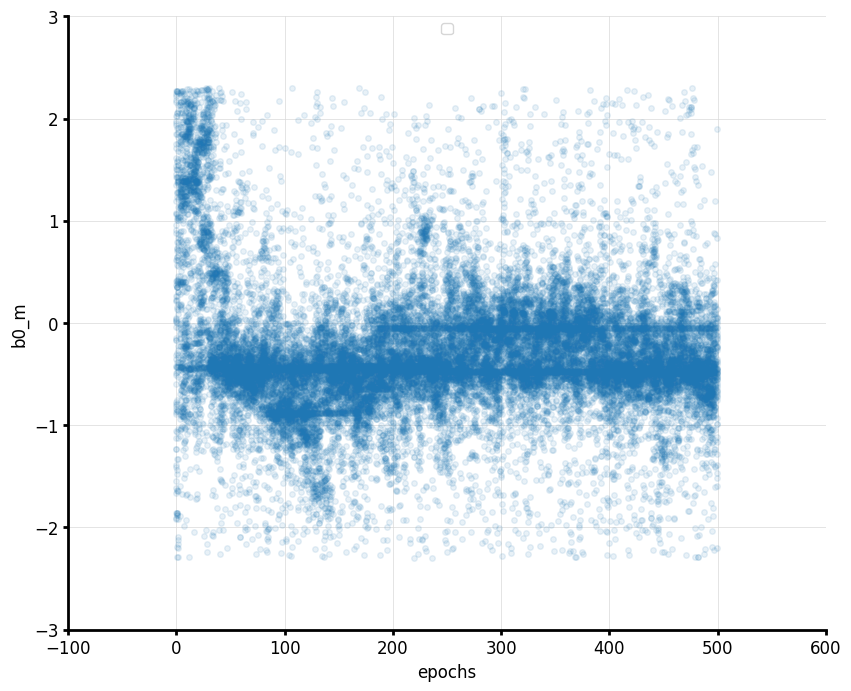

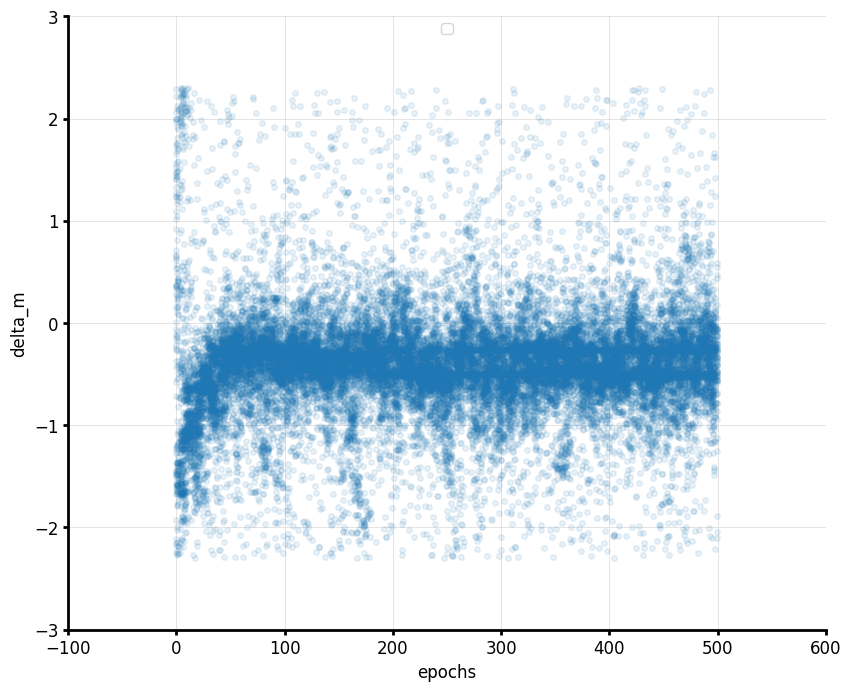

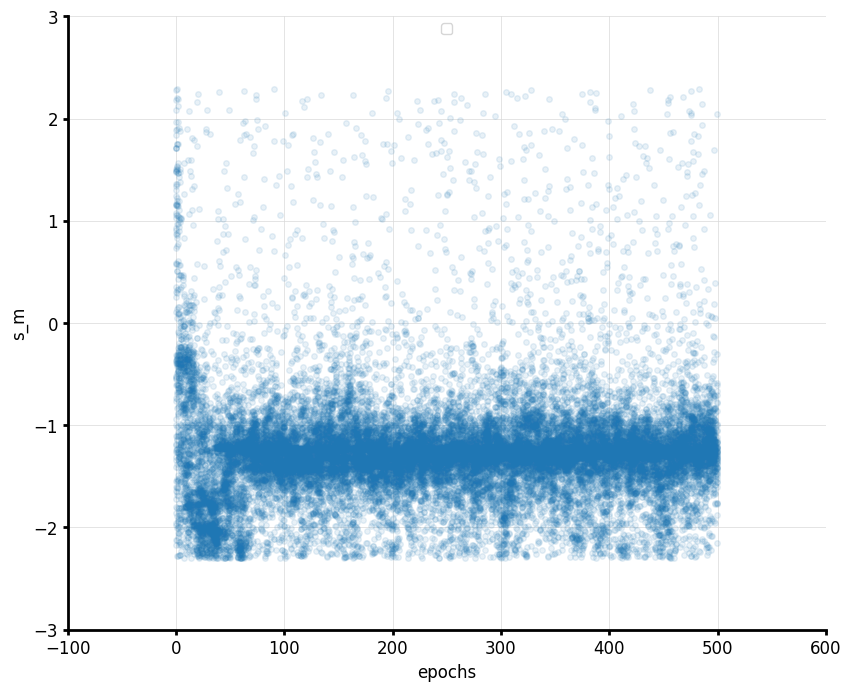

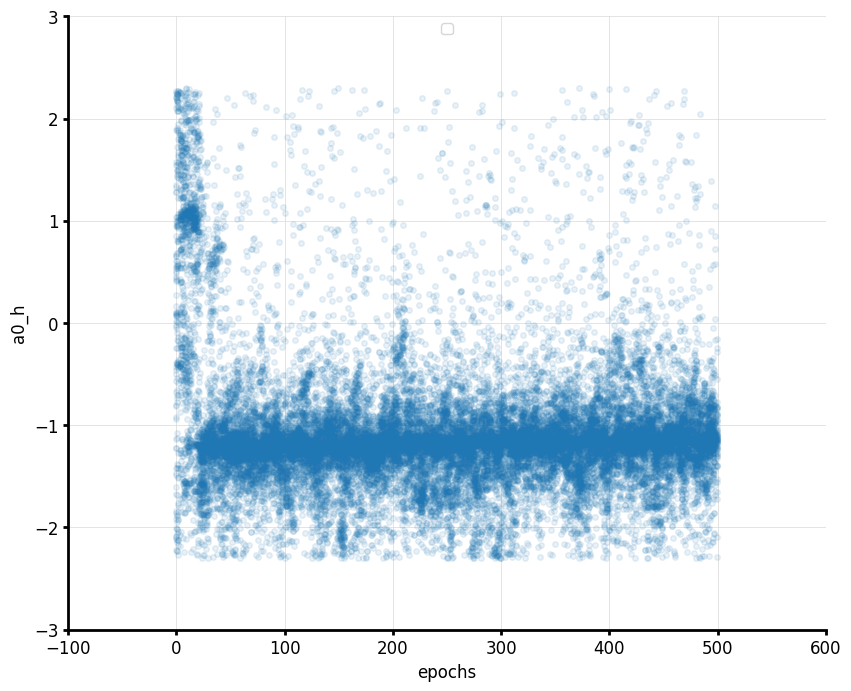

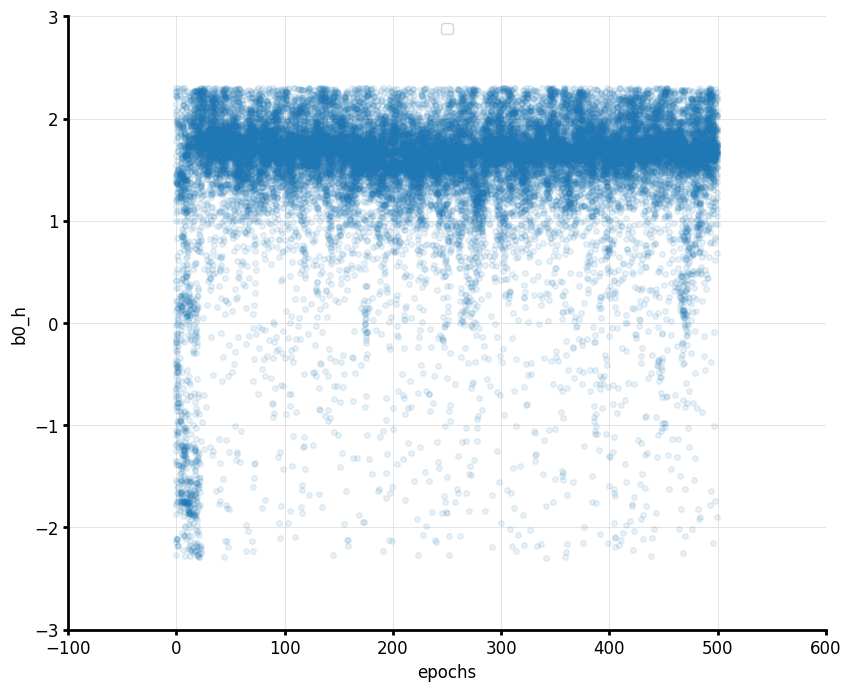

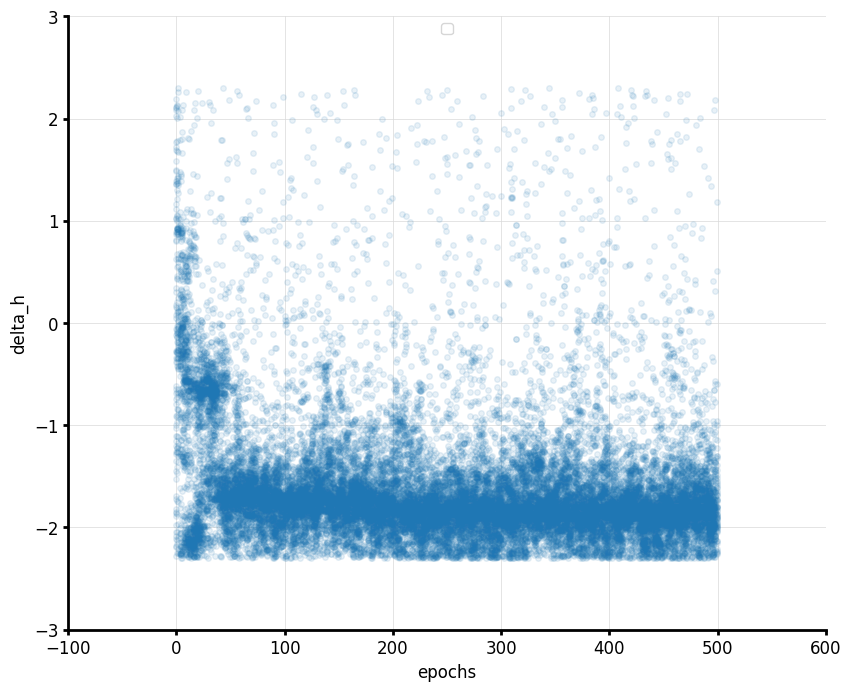

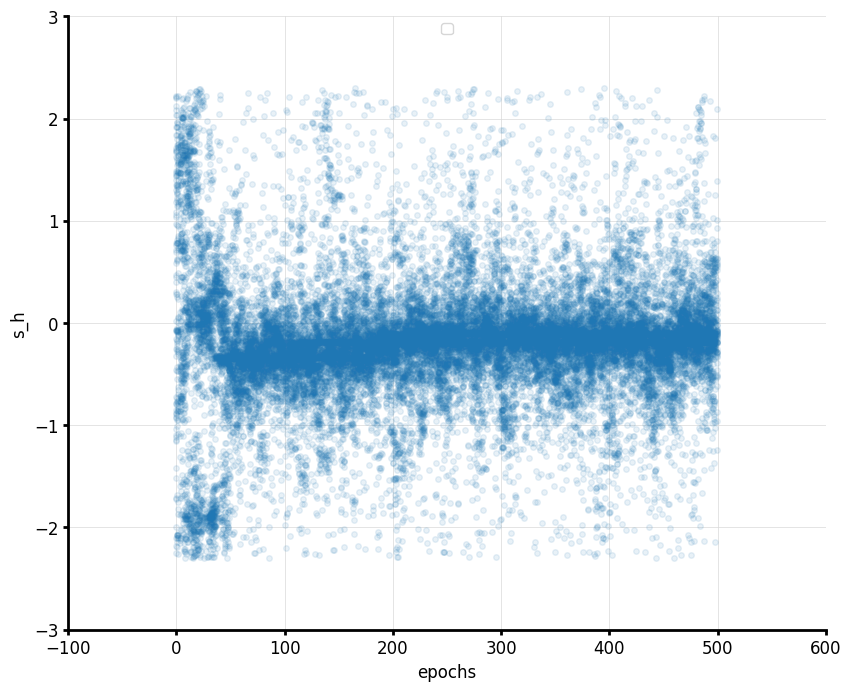

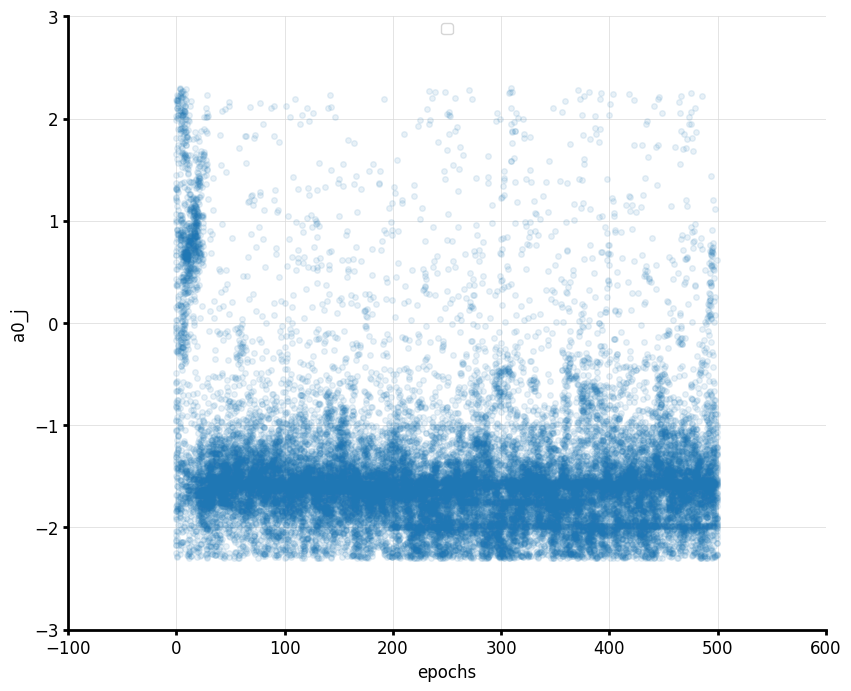

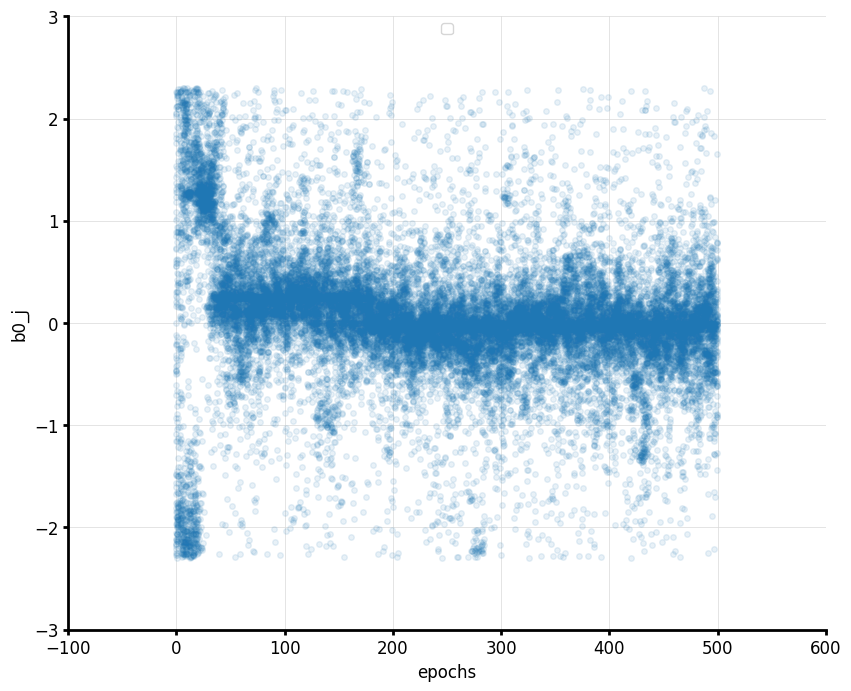

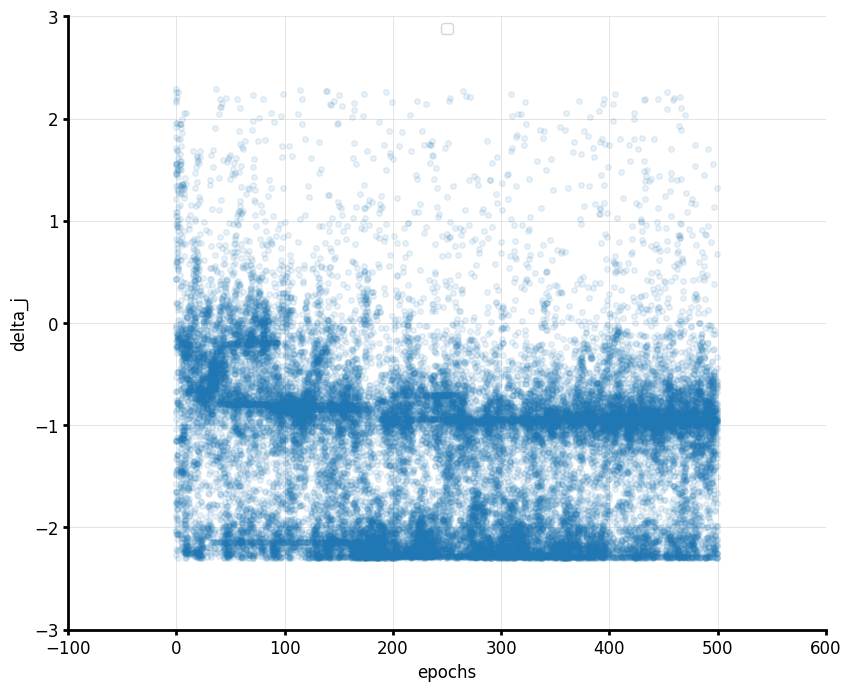

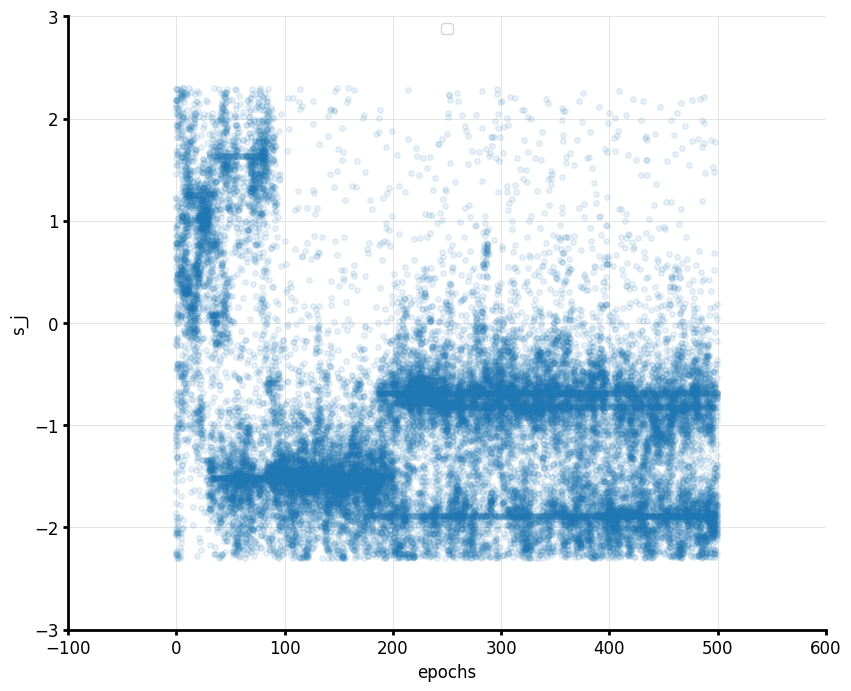

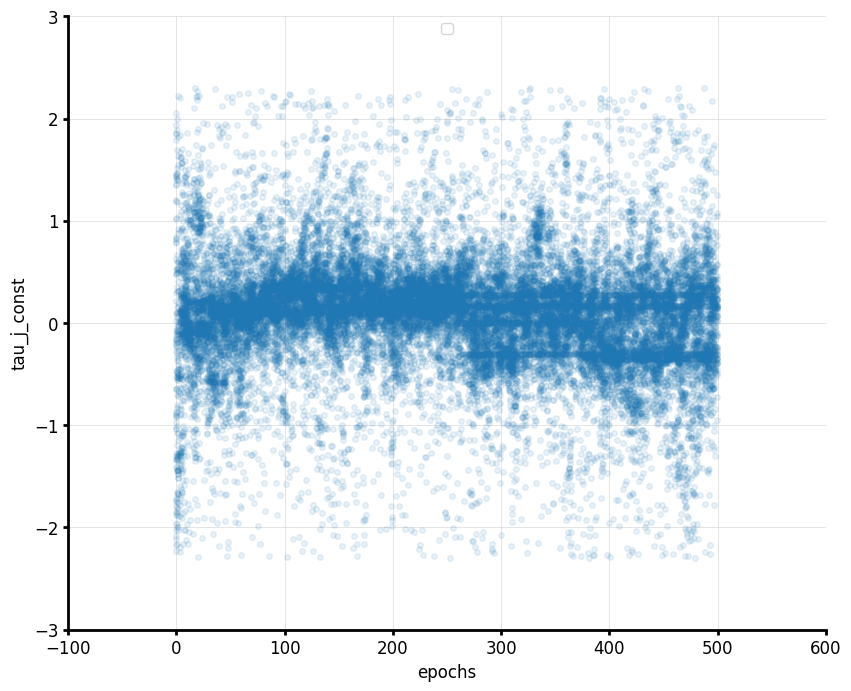

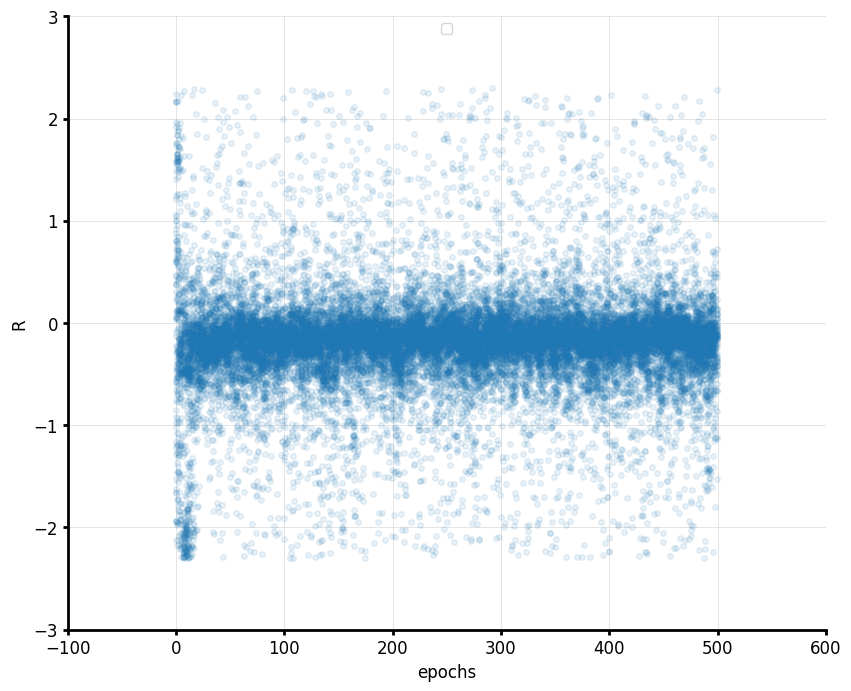

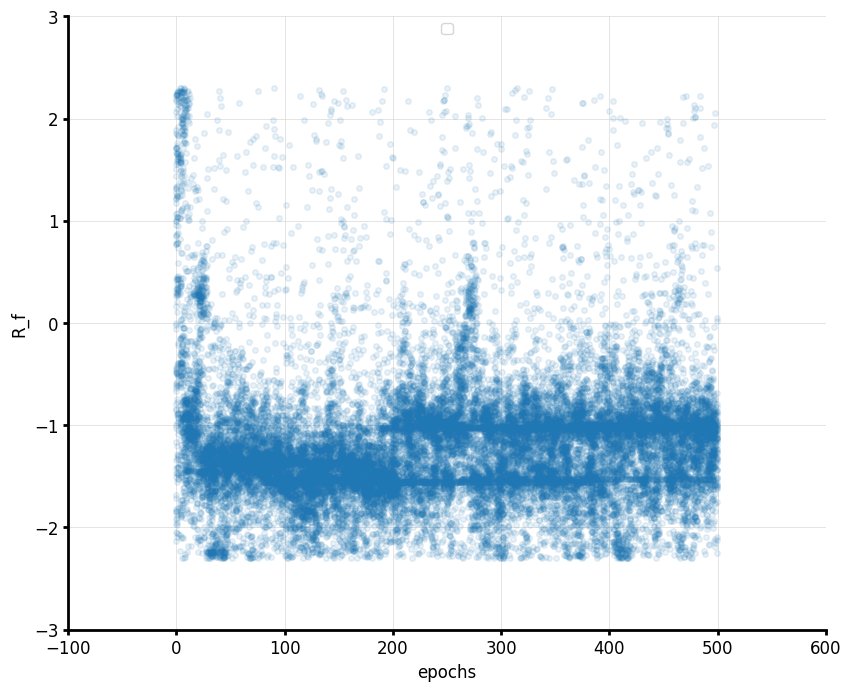

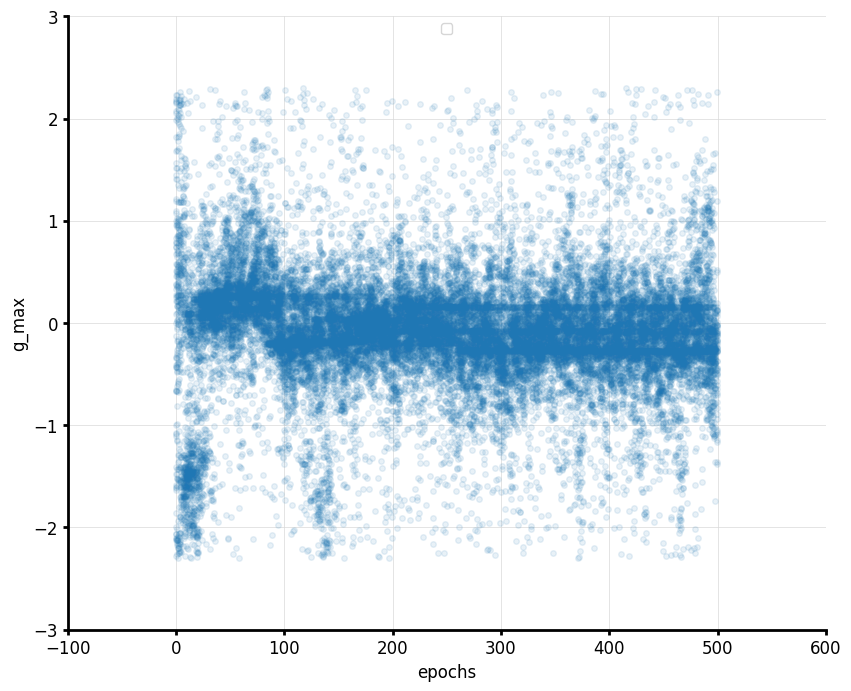

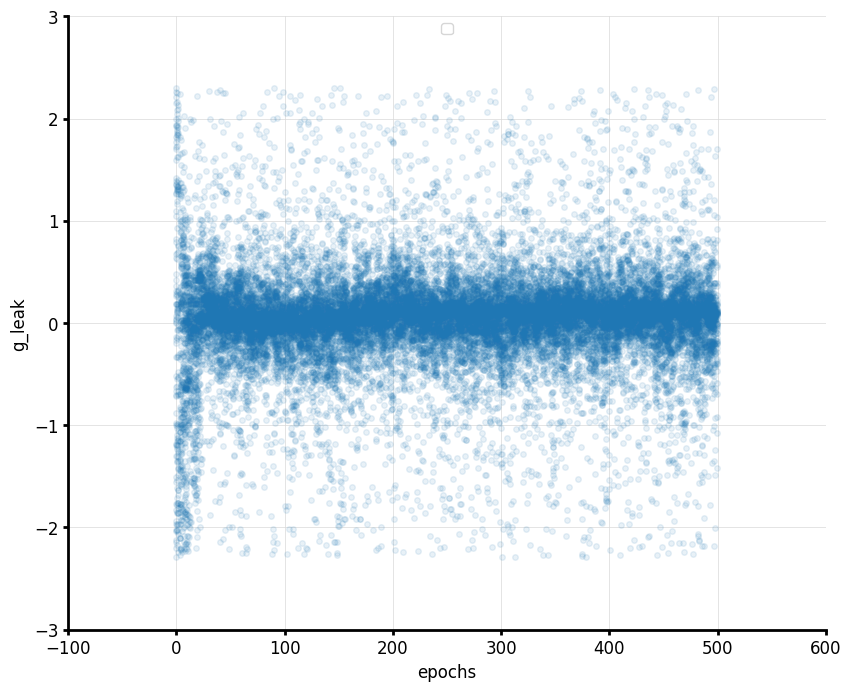

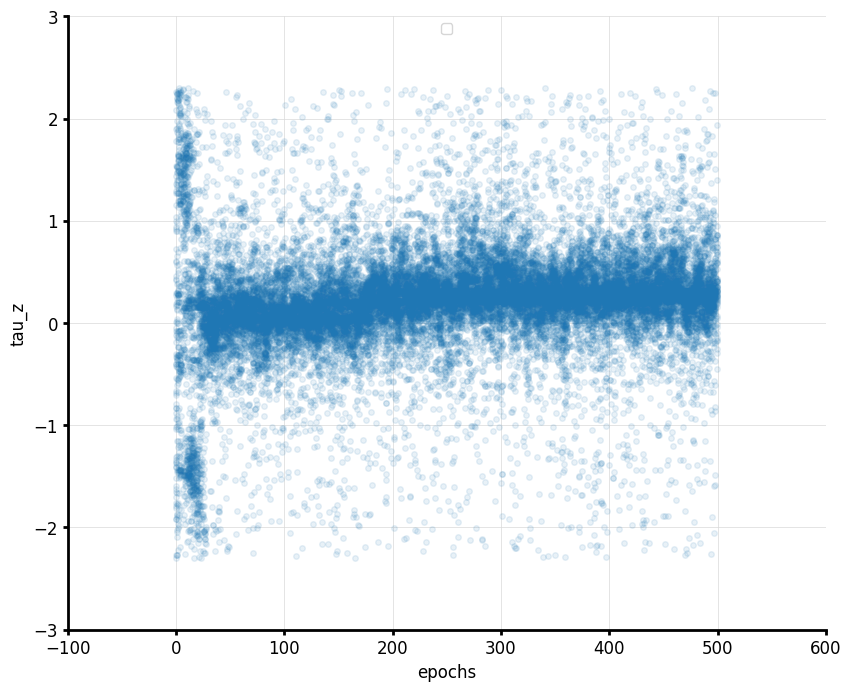

In [304]:
for k in range(20):
    plt.figure()
    plt.plot(epochs,np.log(result['dump']['dump']['genes'][k::24]) ,  '.', alpha=0.1)
    plt.ylabel(lab[k])
    plt.xlabel('epochs')
    #plt.xlim(0,2)
    #plt.ylim(1900, 2000)
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


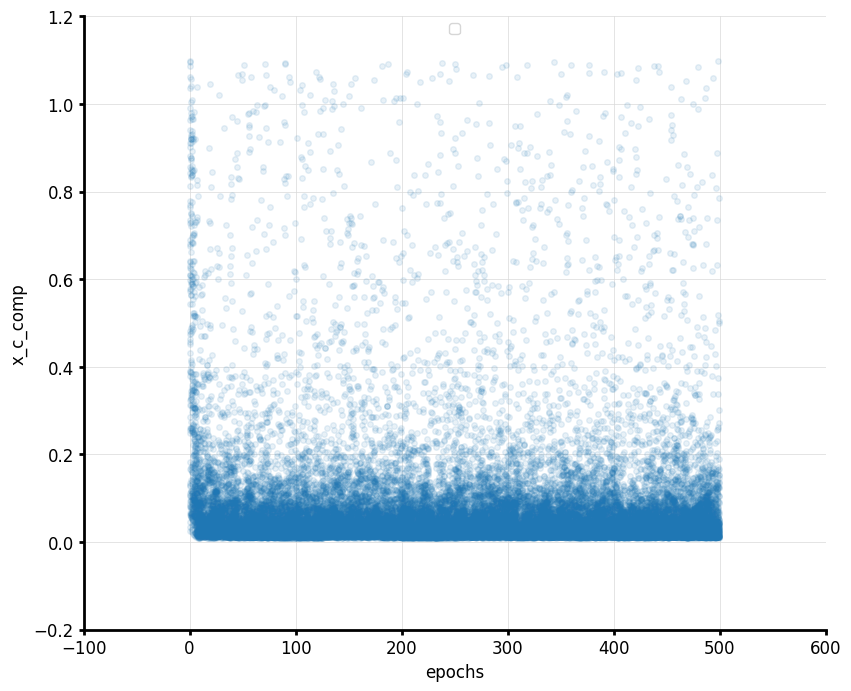

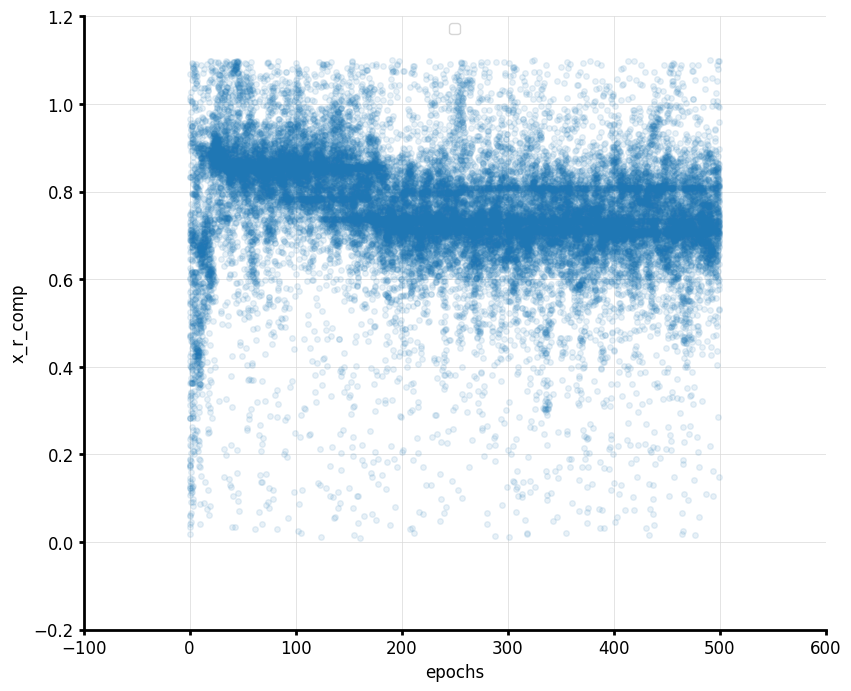

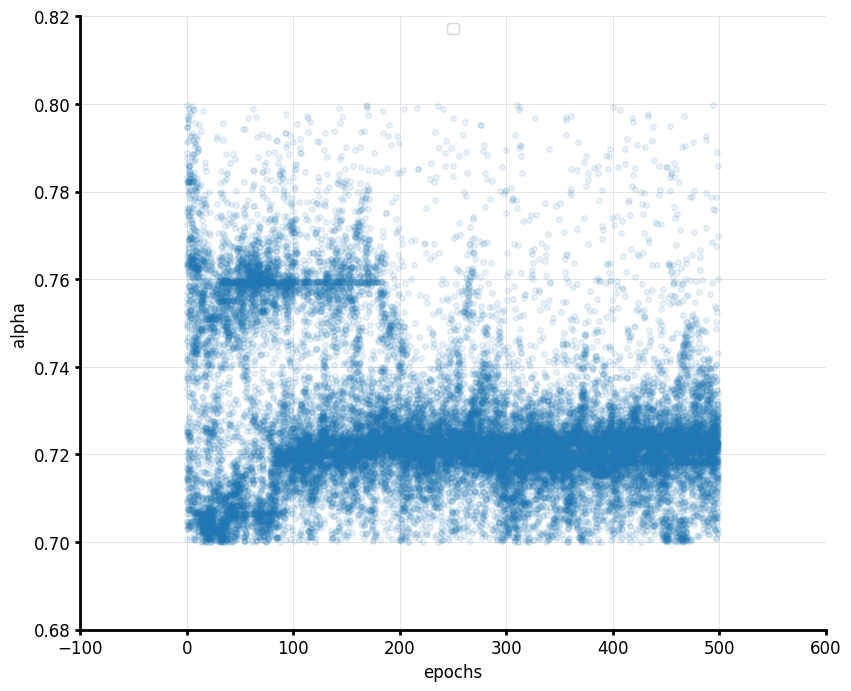

In [305]:
for k in range(20,23):
    plt.figure()
    plt.plot(epochs,result['dump']['dump']['genes'][k::24] ,  '.', alpha=0.1)

    plt.ylabel(lab[k])
    plt.xlabel('epochs')
    #plt.xlim(0,2)
    #plt.ylim(1900, 2000)
    plt.legend()